<a href="https://colab.research.google.com/github/Cristobalm26/Actividades_EIE401/blob/main/Actividades/Actividad_7/Actividad_7_Crist%C3%B3bal_Moraga_19_841_682_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Cristóbal Antonio Moraga Acosta</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [ ]:
pip install numpy torch opencv-python matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


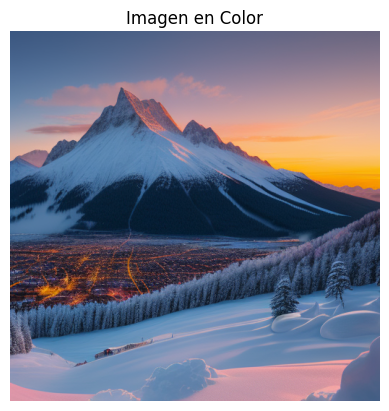

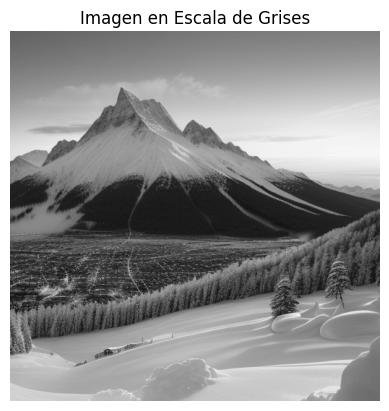

True

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Ruta imagen
ruta_imagen = '/content/drive/MyDrive/Colab Notebooks/image.png'

# Carga de imagen utilizando OpenCV
imagen = cv2.imread(ruta_imagen)

# Conversion de la imagen de BGR a RGB (Matplotlib utiliza el formato RGB)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Imagen a color
plt.imshow(imagen_rgb)
plt.title('Imagen en Color')
plt.axis('off')
plt.show()

# Conversion de la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')
plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

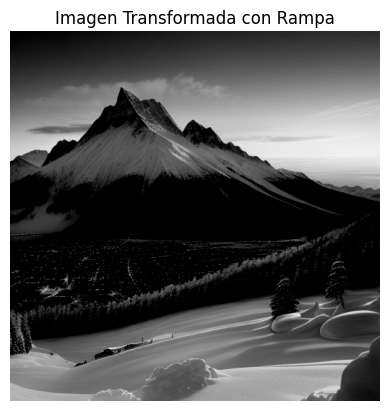

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Función de rampa con pendiente definida
def rampa(pixeles, umbral, pendiente):
    # Inicializa la salida con el mismo tamaño que los pixeles de entrada
    salida = np.zeros_like(pixeles, dtype=np.float32)

    # Función de rampa
    for i in range(pixeles.shape[0]):
        for j in range(pixeles.shape[1]):
            if pixeles[i, j] < umbral:
                salida[i, j] = 0
            else:
                salida[i, j] = min(255, pendiente * (pixeles[i, j] - umbral))

    # Se asegura que los valores están en el rango [0, 255]
    salida = np.clip(salida, 0, 255).astype(np.uint8)

    return salida

# Ruta de la imagen en Google Drive
ruta_imagen = '/content/drive/MyDrive/Colab Notebooks/image.png'

# Cargar de la imagen utilizando OpenCV
imagen = cv2.imread(ruta_imagen)

# Conversion de la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)


# Umbral y pendiente
umbral = 85
pendiente = 2

# Transformación de rampa
imagen_transformada = rampa(imagen_gris, umbral, pendiente)

# Mostrar la imagen transformada
plt.imshow(imagen_transformada, cmap='gray')
plt.title('Imagen Transformada con Rampa')
plt.axis('off')
plt.show()

#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



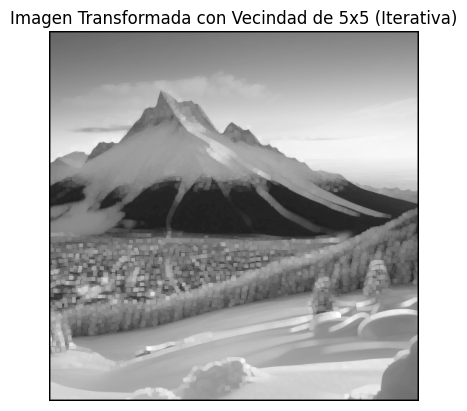

In [43]:
# Dimensiones de la vecindad
vecindad = 5
offset = vecindad // 2

# Copia de la imagen para almacenar el resultado
imagen_transformada = np.zeros_like(imagen_gris)

# Iteracion sobre cada píxel de la imagen
for i in range(offset, imagen_gris.shape[0] - offset):
    for j in range(offset, imagen_gris.shape[1] - offset):
        # Obtener la vecindad de 5x5
        vecindad_pixes = imagen_gris[i - offset:i + offset + 1, j - offset:j + offset + 1]
        # Asignar el valor máximo de la vecindad al píxel correspondiente en la imagen transformada
        imagen_transformada[i, j] = np.max(vecindad_pixes)

# Mostrar la imagen transformada
plt.imshow(imagen_transformada, cmap='gray')
plt.title('Imagen Transformada con Vecindad de 5x5 (Iterativa)')
plt.axis('off')
plt.show()


#### 2.3 Aplica transformación de intensidad
![image.png](attachment:image.png)
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

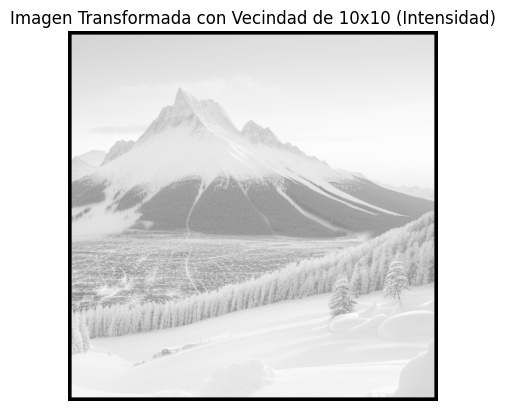

In [44]:
# Función de transformación de intensidad
def transformacion_intensidad(pixeles, c):
    return c * np.log(1 + pixeles)


# Dimensiones de la vecindad
vecindad = 10
offset = vecindad // 2

# coeficiente c
c = 1.0

# Copia de la imagen para almacenar el resultado
imagen_transformada = np.zeros_like(imagen_gris, dtype=np.float32)

# Iterar sobre cada píxel de la imagen
for i in range(offset, imagen_gris.shape[0] - offset):
    for j in range(offset, imagen_gris.shape[1] - offset):
        # Obtener la vecindad de 10x10
        vecindad_pixes = imagen_gris[i - offset:i + offset + 1, j - offset:j + offset + 1]
        # Aplicar la transformación de intensidad a la vecindad
        vecindad_transformada = transformacion_intensidad(vecindad_pixes, c)
        # Asignar el valor central de la vecindad transformada al píxel correspondiente en la imagen transformada
        imagen_transformada[i, j] = vecindad_transformada[offset, offset]

# Normalizar la imagen transformada para asegurar que los valores estén en el rango [0, 255]
imagen_transformada = cv2.normalize(imagen_transformada, None, 0, 255, cv2.NORM_MINMAX)
imagen_transformada = np.clip(imagen_transformada, 0, 255).astype(np.uint8)

# Mostrar la imagen transformada
plt.imshow(imagen_transformada, cmap='gray')
plt.title('Imagen Transformada con Vecindad de 10x10 (Intensidad)')
plt.axis('off')
plt.show()

#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

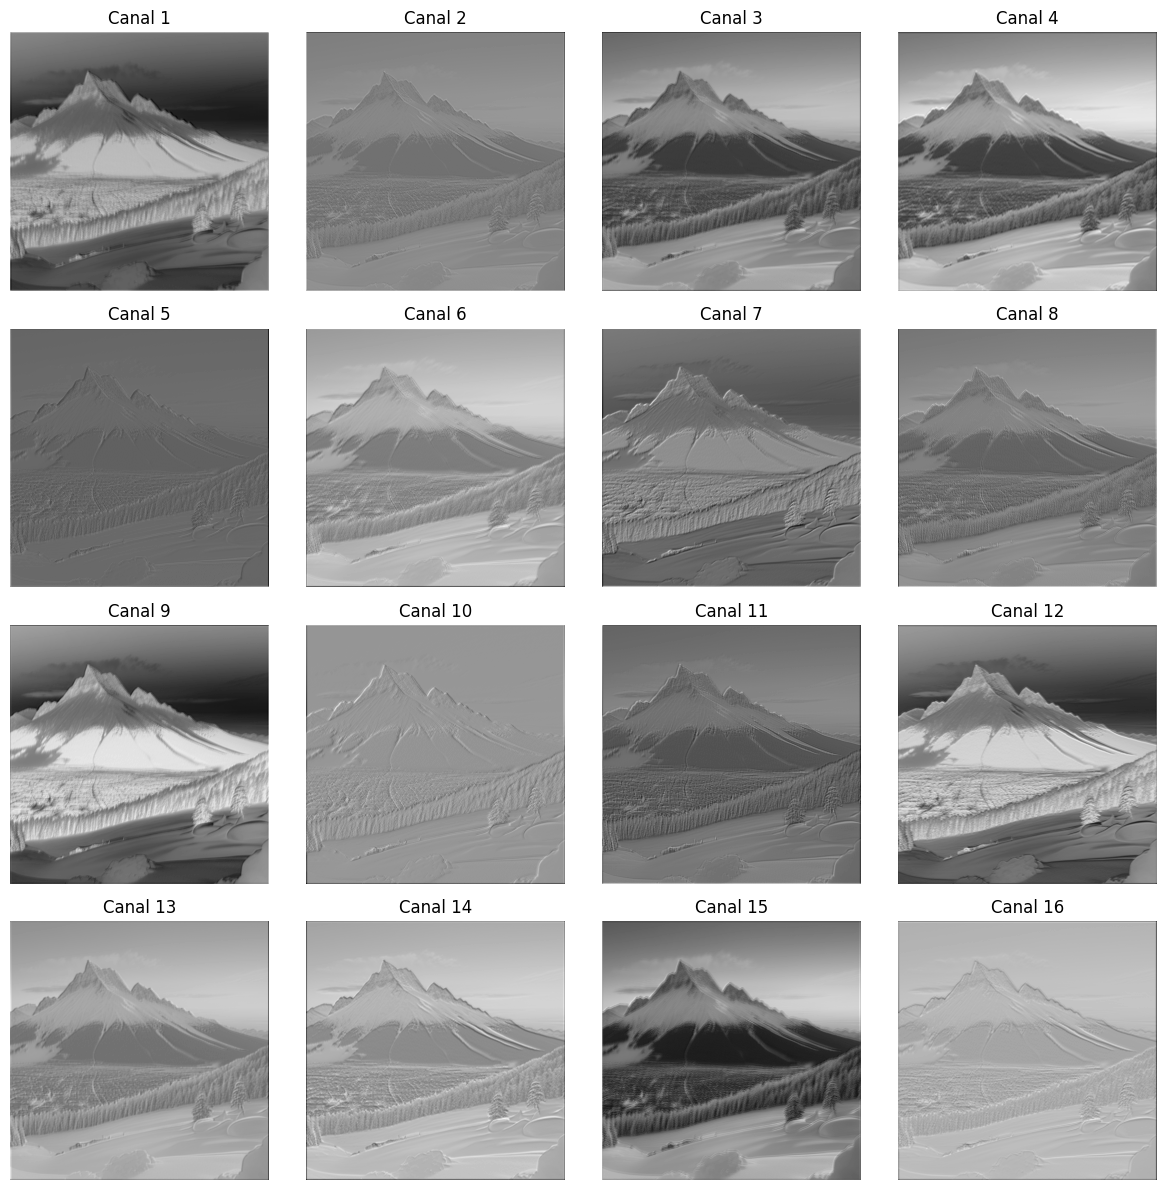

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms

# Cargar la imagen utilizando OpenCV en escala de grises
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

# Normalizar la imagen al rango [0, 1]
imagen = imagen / 255.0

# Conversion de la imagen a un tensor de PyTorch
imagen_tensor = torch.tensor(imagen, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Capas de convolución
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

# Operaciones de convolución en cascada
salida1 = conv1(imagen_tensor)
salida2 = conv2(salida1)
salida_final = conv3(salida2)

# Conversion de las salidas a numpy para visualizarlas
salida1_np = salida1.detach().numpy().squeeze()
salida2_np = salida2.detach().numpy().squeeze()
salida_final_np = salida_final.detach().numpy().squeeze()

# Se muestran los resultados de cada canal de salida
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(salida_final_np[i], cmap='gray')
    axes[i].set_title(f'Canal {i+1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


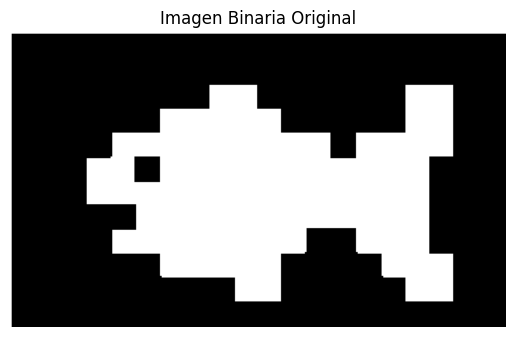

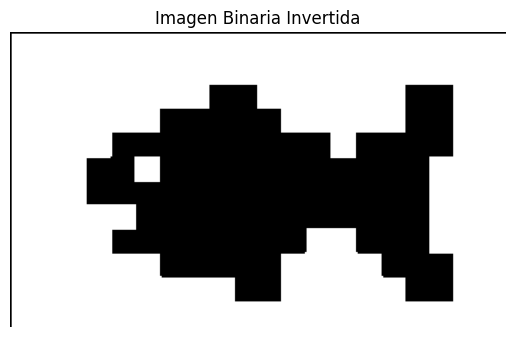

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Ruta de la imagen binaria en Google Drive
ruta_imagen_binaria = '/content/drive/MyDrive/Colab Notebooks/imagen_binaria.png'

# Imagen binaria utilizando OpenCV
imagen_binaria = cv2.imread(ruta_imagen_binaria, cv2.IMREAD_GRAYSCALE)

# Asegurarse de que la imagen es binaria (valores 0 y 255)
imagen_binaria = (imagen_binaria > 127).astype(np.uint8)

# Imagen binaria original
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Binaria Original')
plt.axis('off')
plt.show()

# Inversion de la imagen binaria
imagen_invertida = 1 - imagen_binaria

# Mostrar la imagen binaria invertida
plt.imshow(imagen_invertida, cmap='gray')
plt.title('Imagen Binaria Invertida')
plt.axis('off')
plt.show()


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



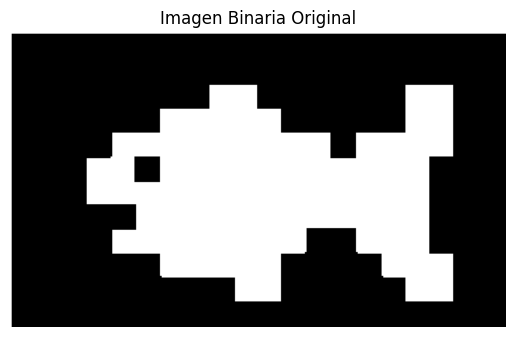

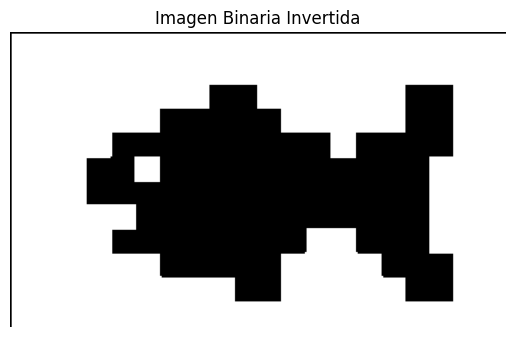

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch

# Convertir la imagen binaria a un tensor de PyTorch
imagen_tensor = torch.tensor(imagen_binaria, dtype=torch.float32)

# Invertir la imagen binaria en el tensor
imagen_invertida_tensor = 1 - imagen_tensor

# Convertir el tensor invertido de vuelta a una imagen numpy
imagen_invertida = imagen_invertida_tensor.numpy().astype(np.uint8)

# Imagen binaria original
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Binaria Original')
plt.axis('off')
plt.show()

# Imagen binaria invertida
plt.imshow(imagen_invertida, cmap='gray')
plt.title('Imagen Binaria Invertida')
plt.axis('off')
plt.show()

## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

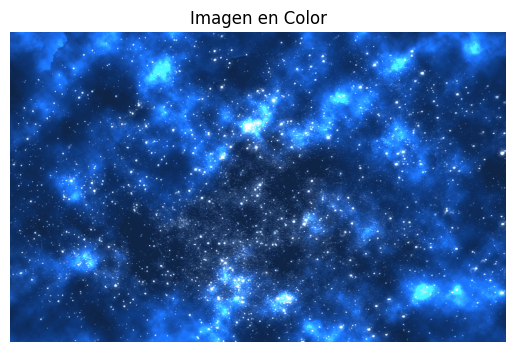

3


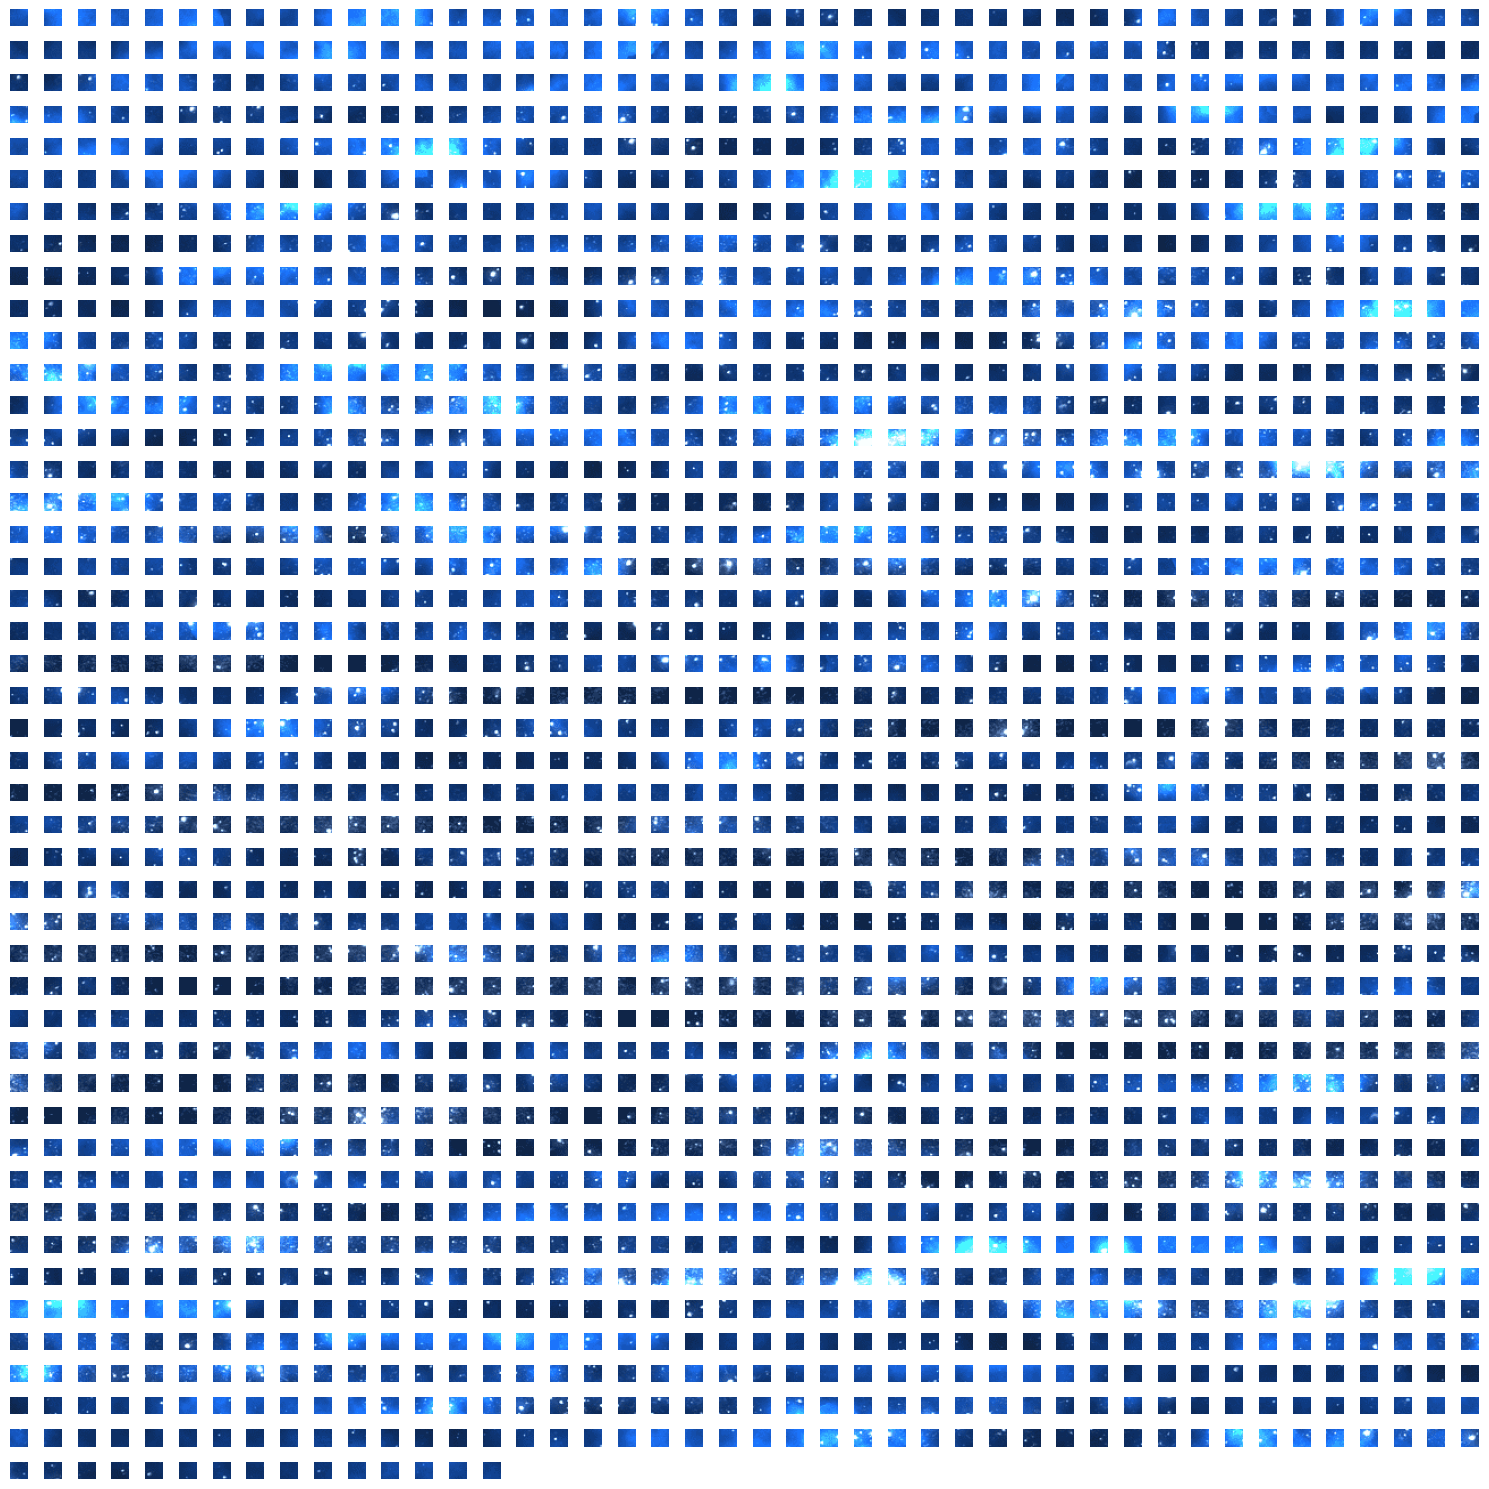

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Ruta de la imagen
ruta_imagen_rgb = '/content/drive/MyDrive/Colab Notebooks/imagen_rbg.png'

# Carga de imagen utilizando OpenCV
imagen = cv2.imread(ruta_imagen_rgb)

# Conversion de la imagen de BGR a RGB
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Imagen a color
plt.imshow(imagen_rgb)
plt.title('Imagen en Color')
plt.axis('off')
plt.show()

def mostrar_parches(imagen, tamano_parche):
    # Dimensiones de la imagen
    altura, ancho, canales = imagen.shape
    print(canales)

    # Verificar si el tamaño del parche es válido
    if tamano_parche <= 0:
        raise ValueError("El tamaño del parche debe ser mayor que cero.")

    # Redimensionar la imagen si no es divisible por el tamaño del parche
    altura_nueva = altura - (altura % tamano_parche)
    ancho_nuevo = ancho - (ancho % tamano_parche)
    imagen = imagen[:altura_nueva, :ancho_nuevo]

    # Dividir la imagen en parches
    parches = []
    for i in range(0, altura_nueva, tamano_parche):
        for j in range(0, ancho_nuevo, tamano_parche):
            parche = imagen[i:i+tamano_parche, j:j+tamano_parche]
            parches.append(parche)

    # Mostrar los parches
    num_parches = len(parches)
    num_columnas = int(np.sqrt(num_parches))
    num_filas = int(np.ceil(num_parches / num_columnas))

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 15))
    axes = axes.flatten()

    for idx, parche in enumerate(parches):
        axes[idx].imshow(cv2.cvtColor(parche, cv2.COLOR_BGR2RGB))
        axes[idx].axis('off')

    for idx in range(len(parches), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Cargar la imagen utilizando OpenCV
imagen_rgb = cv2.imread(ruta_imagen_rgb)

# Mostrar los parches de la imagen
mostrar_parches(imagen_rgb, tamano_parche=16)


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
